<a href="https://colab.research.google.com/github/shreekarmn/shreekarmn/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Covid Data.csv")

In [ ]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
(df.duplicated().sum()/df.shape[0]*100)

77.44310135183463

In [ ]:
df.shape[0]

1048575

In [ ]:
df.info()

In [ ]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [ ]:
df_null=df.copy()
for i in [97,98,99]:
   df_null.replace(i,np.nan,inplace=True)


In [ ]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

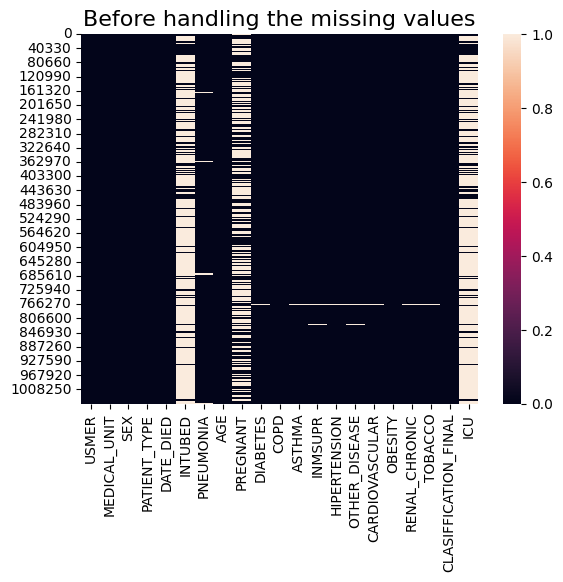

In [ ]:
sns.heatmap(df_null.isnull())
plt.title("Before handling the missing values",color="black",fontsize=16)
plt.show()


In [ ]:
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [ ]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [ ]:
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [ ]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [ ]:
df['DATE_DIED'].isnull().sum()

971633

In [ ]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,79.523,36.869,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.347,11.913,1.0,2.0,2.0,2.0,99.0
AGE,41.794,16.907,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.766,47.511,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186,5.424,1.0,2.0,2.0,2.0,98.0
COPD,2.261,5.132,1.0,2.0,2.0,2.0,98.0


In [ ]:
df['AGE'][df['AGE'] > 110].value_counts().sum()

22

In [ ]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [ ]:
df[(df['SEX'] == 1)].shape

(525064, 22)

In [ ]:
df[(df['SEX'] == 2)].shape

(523511, 22)

In [ ]:
df[(df['SEX'] == 1)]['PREGNANT']

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [ ]:
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
513179+8131+3754

525064

In [ ]:
df[(df['SEX']==2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [ ]:
df[(df['SEX'] == 2)&(df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

In [ ]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
df['PREGNANT'].replace(97,2 ,inplace = True)

In [ ]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
for i in [1,2,97,99]:
  for j in [1,2]:
    print(f"AT PATIENT_TYPE = {j}and at the shape will be : ","\n")
    print(df[(df['PATIENT_TYPE']==j)&(df['ICU']== i)].shape,"\n","----------------------------------------------------------------------","\n\n")


AT PATIENT_TYPE = 1and at the shape will be :  

(0, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 2and at the shape will be :  

(16858, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 1and at the shape will be :  

(0, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 2and at the shape will be :  

(175685, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 1and at the shape will be :  

(848544, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 2and at the shape will be :  

(0, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 1and at the shape will be :  

(0, 22) 
 ---------------------------------------------------------------------- 


AT PATIENT_TYPE = 2and at the shape will be :  

(7488,

In [ ]:
df['INTUBED'].replace(97,2,inplace = True)

In [ ]:
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

In [ ]:
for i in[98,99]:
  df.replace(i,np.nan,inplace = True)

df.head(5)



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0,1
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,97.0,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,97.0,1
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0,1


In [ ]:
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")



In [ ]:
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

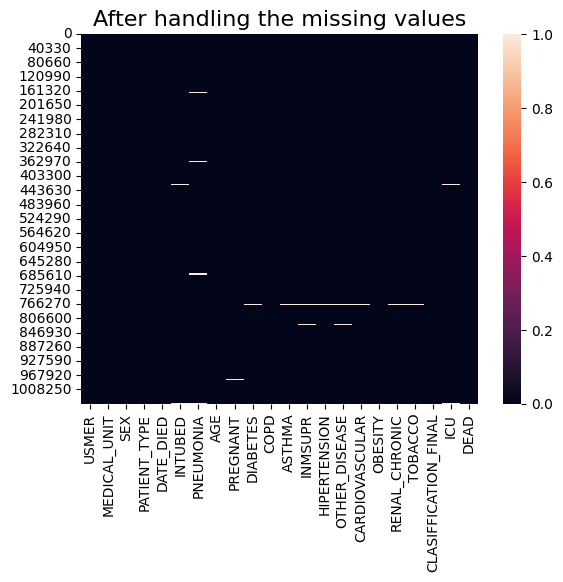

In [ ]:
sns.heatmap(df_null2.isnull())
plt.title('After handling the missing values',color = 'black',fontsize=16)
plt.show()



In [ ]:
df.describe().round(3).T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


In [ ]:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(df[i].value_counts()))


USMER  ->  {2: 662903, 1: 385672}
MEDICAL_UNIT  ->  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  ->  {1: 525064, 2: 523511}
PATIENT_TYPE  ->  {1: 848544, 2: 200031}
INTUBED  ->  {2.0: 1007594, 1.0: 33656}
PNEUMONIA  ->  {2.0: 892534, 1.0: 140038}
PREGNANT  ->  {2.0: 1036690, 1.0: 8131}
DIABETES  ->  {2.0: 920248, 1.0: 124989}
COPD  ->  {2.0: 1030510, 1.0: 15062}
ASTHMA  ->  {2.0: 1014024, 1.0: 31572}
INMSUPR  ->  {2.0: 1031001, 1.0: 14170}
HIPERTENSION  ->  {2.0: 882742, 1.0: 162729}
OTHER_DISEASE  ->  {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR  ->  {2.0: 1024730, 1.0: 20769}
OBESITY  ->  {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC  ->  {2.0: 1026665, 1.0: 18904}
TOBACCO  ->  {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL  ->  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  ->  {97.0: 848544, 2.0: 175685, 1.0: 16858}
DEAD  ->  {0: 971633, 1: 76942}


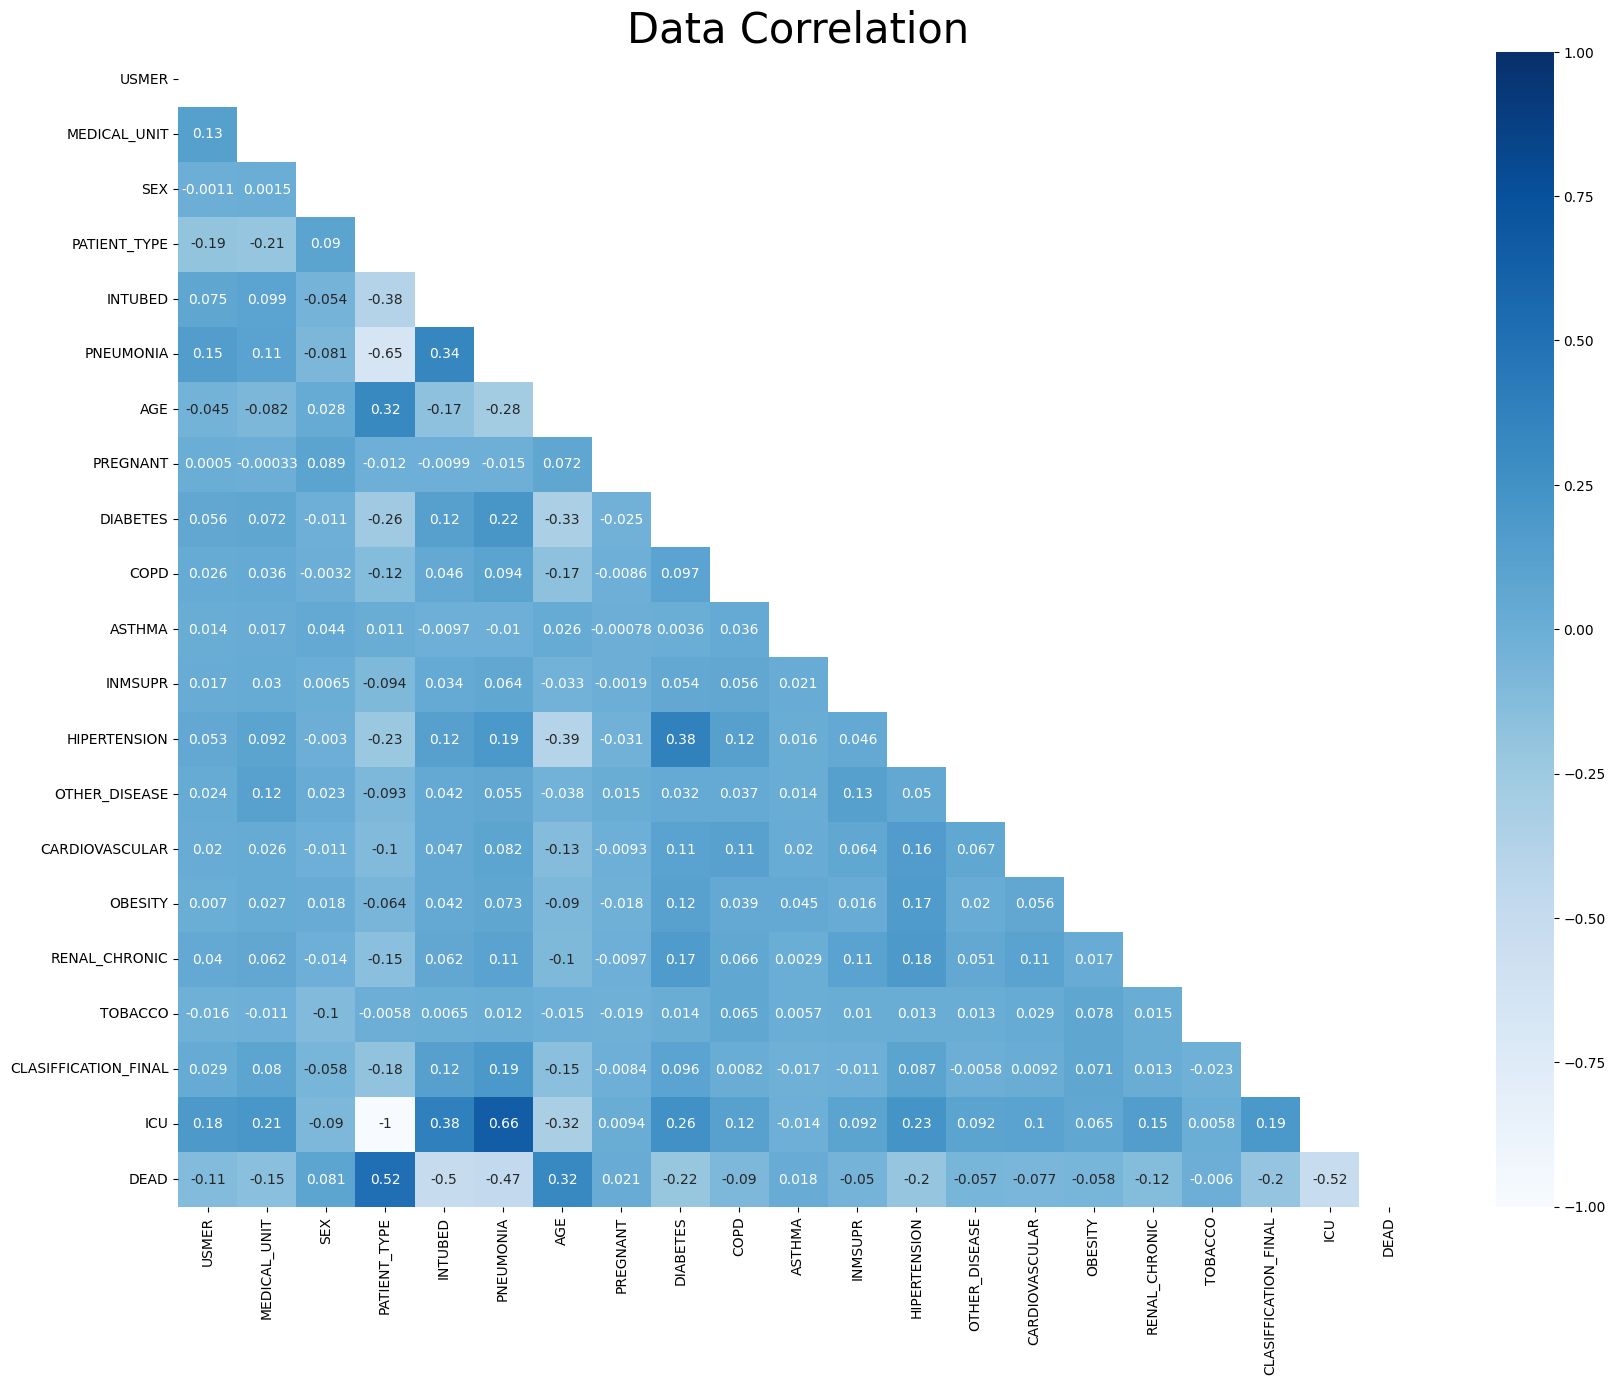

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()


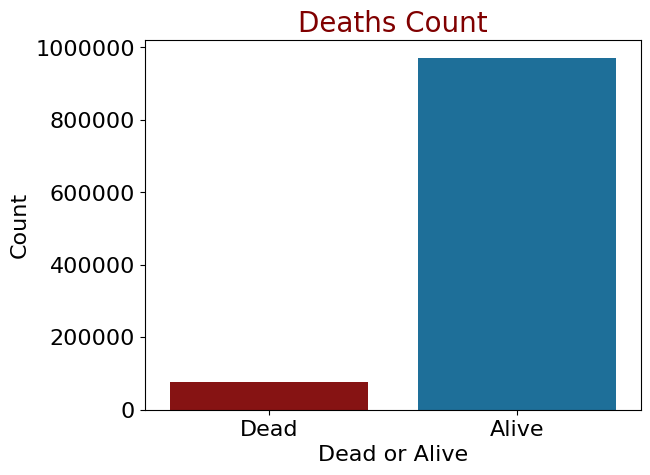

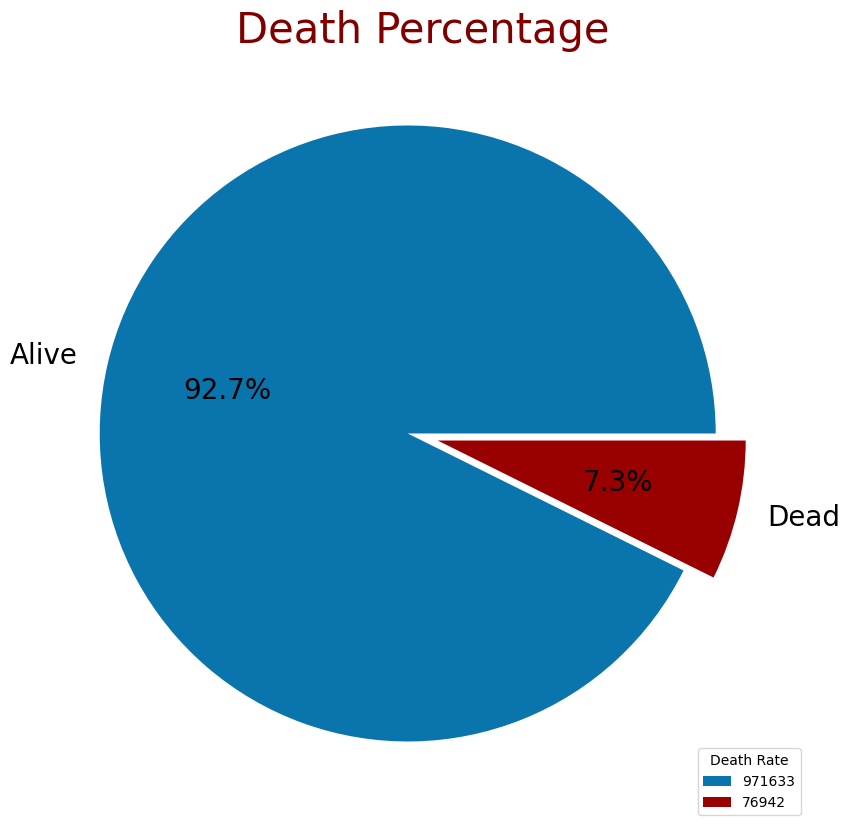

In [ ]:
dict(df['DEAD'].value_counts())[1]
76942
from matplotlib.ticker import FormatStrFormatter
D = df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(0, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=16)
plt.ylabel("Count", fontsize=16)
labels=['Alive','Dead']
sizes=df['DEAD'].value_counts()
colors=['#0a75ad','#990000']
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',textprops={'fontsize':20,'color':"black"}, colors=colors, explode=[0.05,0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [ ]:
df_dead = df[df["DEAD"] == 1]
df_dead.head(2)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0,1
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,97.0,1


In [ ]:
df_dead["CLASIFFICATION_FINAL"].value_counts()


3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
def Covid_or_Not(val):
  if val >= 4:
    return "Not a Covid 19 Carrier"
  else:
    return "A Covid 19 Carrier"
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)



<ipython-input-49-3b14ca5d6725>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)


In [ ]:
df['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

In [ ]:
df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0,1,A Covid 19 Carrier
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,97.0,1,Not a Covid 19 Carrier
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,97.0,1,Not a Covid 19 Carrier
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,97.0,0,NaN
1048571,1,13,2,2,NaN,2.0,2.0,51.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0,NaN
1048572,2,13,2,1,NaN,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,97.0,0,NaN
1048573,2,13,2,1,NaN,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,97.0,0,NaN


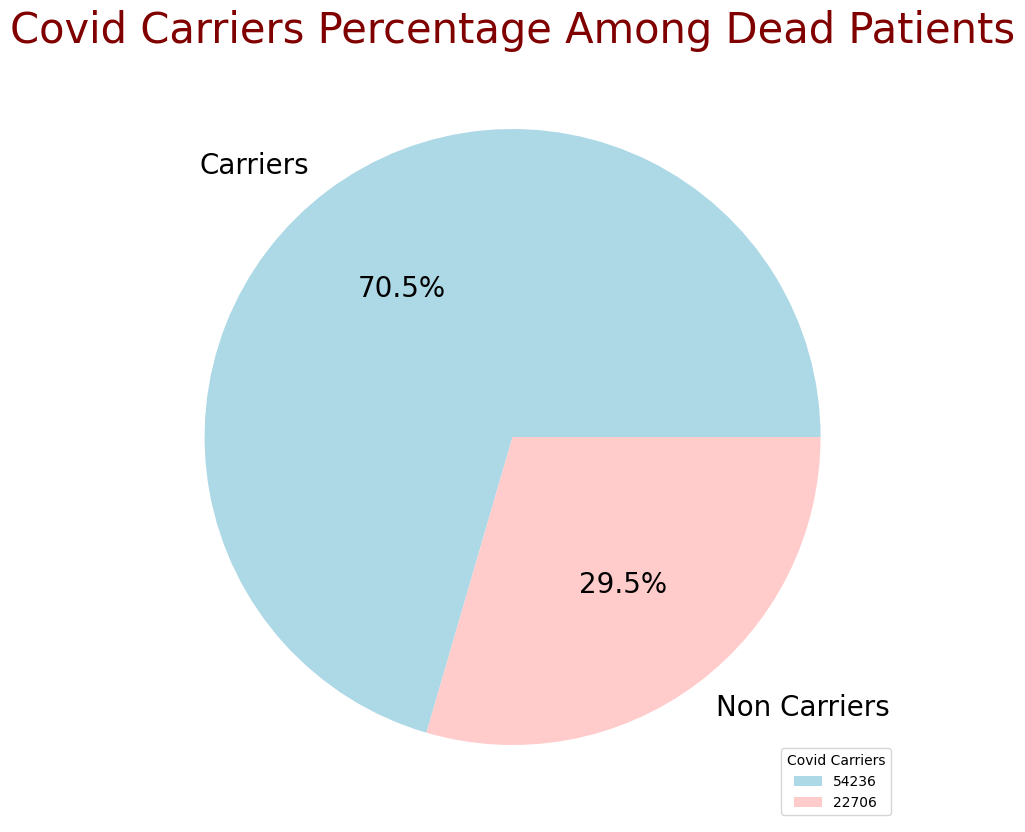

In [ ]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#ADD8E6', '#FFCCCB']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage Among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()


In [ ]:
df["Covid_or_Not"].value_counts()


A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: Covid_or_Not, dtype: int64

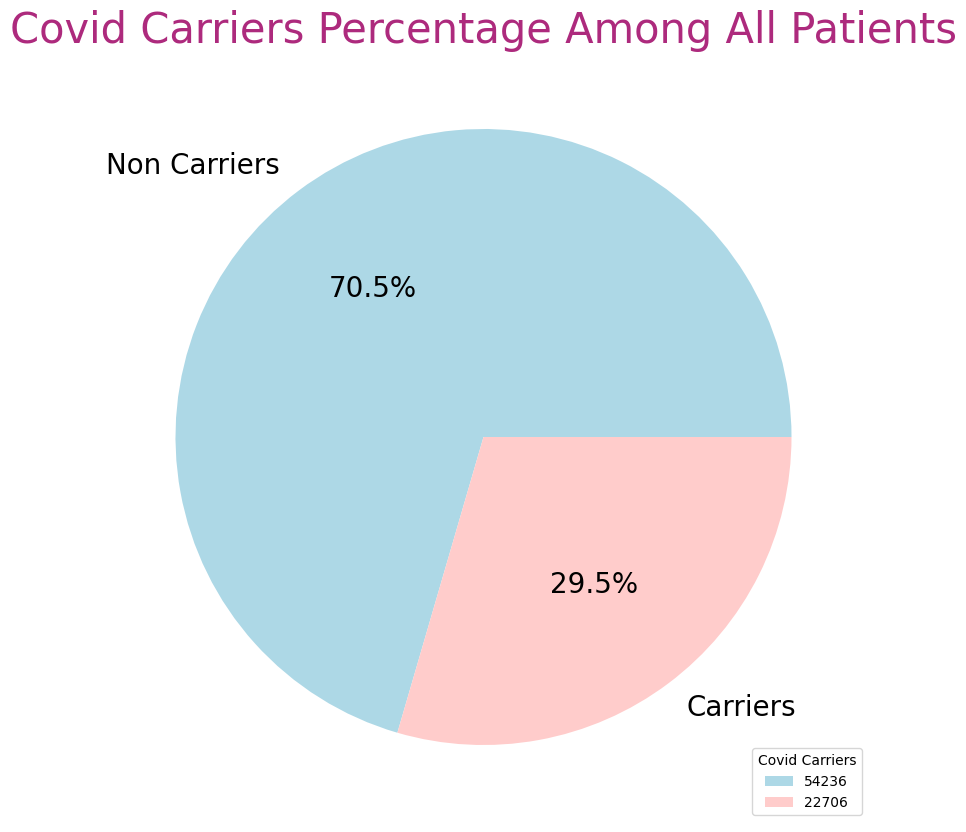

In [ ]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ADD8E6', '#FFCCCB']
plt.figure(figsize = (10,10))
plt.pie(sizes , labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage Among All Patients', color = '#ad2a7d', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()


In [ ]:
  df['Covid_or_Not'].value_counts()

A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: Covid_or_Not, dtype: int64

In [ ]:
Covid_deaths = df[(df['Covid_or_Not'] == 'A Covid 19 Carrier')]

In [ ]:
Covid_deaths["DEAD"].value_counts()

1    54236
Name: DEAD, dtype: int64

ValueError: ignored

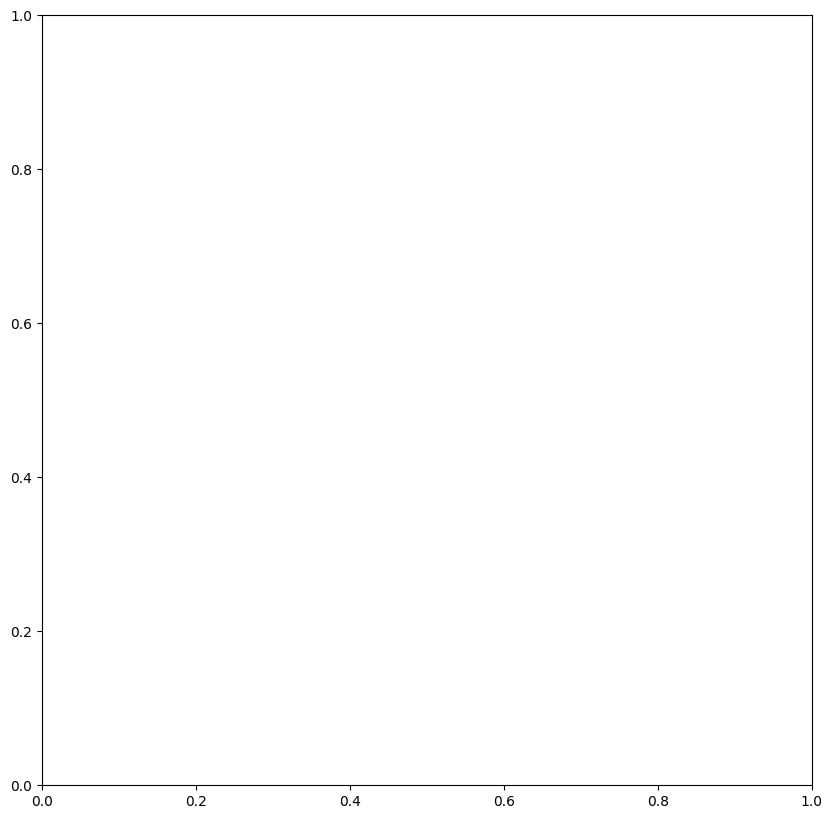

In [ ]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#ADD8E6', '#FFCCCB']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = '#ad2a7d',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()


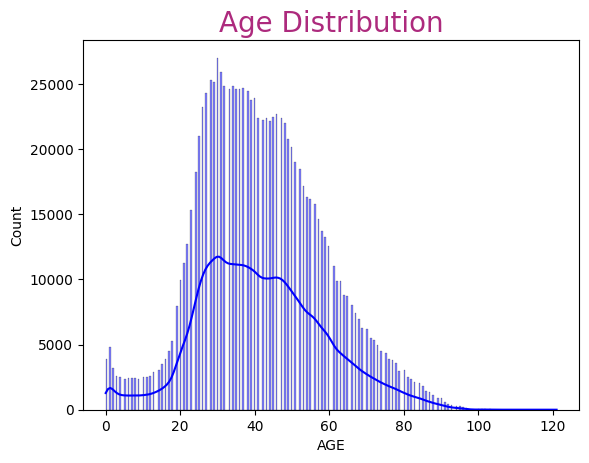

In [ ]:
sns.histplot(x=df.AGE, kde = True, color = "blue")
plt.title("Age Distribution", color = '#ad2a7d', fontsize = 20)
plt.show()
#kde- kernel variation it also called

In [ ]:
df_mod = df.copy()

In [ ]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in df.OBESITY]

In [ ]:
df_mod

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,Not Obese,2.0,2.0,3,97.0,1,A Covid 19 Carrier
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,Obese,1.0,2.0,5,97.0,1,Not a Covid 19 Carrier
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,Not Obese,2.0,2.0,3,2.0,1,A Covid 19 Carrier
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,Not Obese,2.0,2.0,7,97.0,1,Not a Covid 19 Carrier
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,Not Obese,2.0,2.0,3,97.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,Not Obese,2.0,2.0,7,97.0,0,NaN
1048571,1,13,2,2,NaN,2.0,2.0,51.0,2.0,2.0,...,1.0,2.0,2.0,Not Obese,2.0,2.0,7,2.0,0,NaN
1048572,2,13,2,1,NaN,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,Not Obese,2.0,2.0,7,97.0,0,NaN
1048573,2,13,2,1,NaN,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,Not Obese,2.0,2.0,7,97.0,0,NaN


In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette=['yellow', 'red'])
plt.title('Effect of Gender on Covid Classification', color ='black', fontsize= 30)
plt.show()

In [ ]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in df.SEX]

In [ ]:
df_preg = df[df["sex"]==1]
df_preg["PREGNANT"].value_counts()


In [ ]:
df_preg["PREGNANT"]=["Pregnant "if i==1 else "Not Pregnant "]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')